BAG OF WORDS

In [18]:
# Bag of words
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



In [24]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# paragraph
paragraph = """Welcome to the NLP - Deep Learning Bootcamp.
            Hope that you have watched all the resources uploaded on our official notion page.
            I haved most of them but not all of them yet will do so later on .
            """

# preprocessing function
def clean_text(text):
  lemmatizer = WordNetLemmatizer()
  emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
  text = ' '.join(text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(emoji_pattern, '', text)
  text= re.sub(r'\s+', ' ', text)
  text= text.lower().strip()
  return text




sentences_list = nltk.sent_tokenize(paragraph)
corpus = [clean_text(sentence) for sentence in sentences_list]
print(corpus)

['welcome nlp deep learning bootcamp', 'hope watched resource uploaded official notion page', 'i haved yet later']


In [25]:
# builing our vocabulary using scikit-learn

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
X_array = X.toarray()

print(feature_names)
print(X_array)

['bootcamp' 'deep' 'haved' 'hope' 'later' 'learning' 'nlp' 'notion'
 'official' 'page' 'resource' 'uploaded' 'watched' 'welcome' 'yet']
[[1 1 0 0 0 1 1 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 1 1 1 1 1 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 1]]


In [26]:
# applying a machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_score , recall_score , f1_score

df = pd.DataFrame(data=X_array, columns=feature_names, index=corpus)
print(df)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# model = GaussianNB()
# model.fit(X_train, Y_train)
# Y_pred = model.predict(X_test)

# print(confusion_matrix(Y_test, Y_pred))
# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print(precision_score(y_test, y_pred))
# print(recall_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))

                                                    bootcamp  deep  haved  \
welcome nlp deep learning bootcamp                         1     1      0   
hope watched resource uploaded official notion ...         0     0      0   
i haved yet later                                          0     0      1   

                                                    hope  later  learning  \
welcome nlp deep learning bootcamp                     0      0         1   
hope watched resource uploaded official notion ...     1      0         0   
i haved yet later                                      0      1         0   

                                                    nlp  notion  official  \
welcome nlp deep learning bootcamp                    1       0         0   
hope watched resource uploaded official notion ...    0       1         1   
i haved yet later                                     0       0         0   

                                                    page  resource  uploa

TF-IDF

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# function of clean text is already defined with few changes
def clean_text2(text):
  emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
  text= text.lower()
  text = text.split()
  text = ' '.join(text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(emoji_pattern, '', text)
  text= re.sub(r'\s+', ' ', text)
  return text


sentences_list = nltk.sent_tokenize(paragraph)
corpus = [clean_text2(sentence) for sentence in sentences_list]
corpus

['welcome to the nlp deep learning bootcamp',
 'hope that you have watched all the resources uploaded on our official notion page',
 'i haved most of them but not all of them yet will do so later on ']

In [28]:
# Calculating Product of Term Frequency & Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

df

,all,bootcamp,but,deep,do,have,haved,hope,later,learning,...,that,the,them,to,uploaded,watched,welcome,will,yet,you
0,0.000000,0.389888,0.000000,0.389888,0.000000,0.000000,0.000000,0.000000,0.000000,0.389888,...,0.000000,0.296520,0.000000,0.389888,0.000000,0.000000,0.389888,0.000000,0.000000,0.000000
1,0.213114,0.000000,0.000000,0.000000,0.000000,0.280219,0.000000,0.280219,0.000000,0.000000,...,0.280219,0.213114,0.000000,0.000000,0.280219,0.280219,0.000000,0.000000,0.000000,0.280219
2,0.178482,0.000000,0.234682,0.000000,0.234682,0.000000,0.234682,0.000000,0.234682,0.000000,...,0.000000,0.000000,0.469365,0.000000,0.000000,0.000000,0.000000,0.234682,0.234682,0.000000


In [33]:
# Creating a Word Cloud
texts = [
    "Python is a popular programming language.",
    "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
    "Sentiment analysis is the process of classifying the emotional intent of text.",
    "Machine learning is an important application of AI.",
    "Natural Language Processing is used for text analysis.",
    "Python libraries like scikit-learn and NLTK are used in NLP.",
    "AI and machine learning are transforming industries.",
    "If you are interested in NLP, stay tuned!"
]

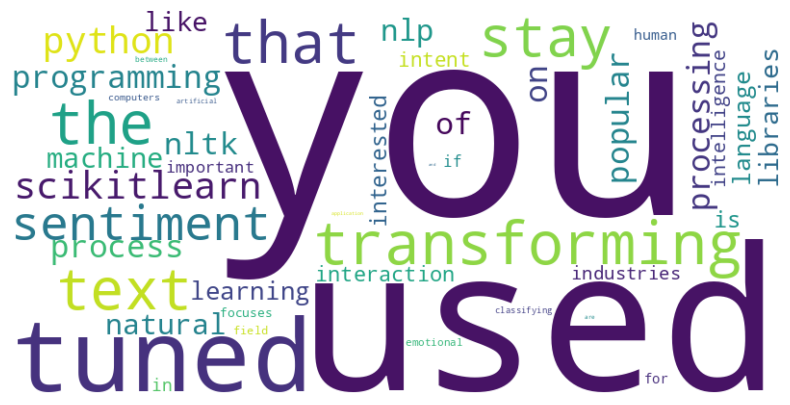

In [34]:
import re

def clean_text(text):
    clean_txt = text.lower()
    # Clear characters other than numbers and letters of the alphabet only
    clean_txt = re.sub(r'[^0-9a-zçğıiöşü\s]', '', clean_txt,
                       flags=re.IGNORECASE)

    return ' '.join(sorted(clean_txt.split()))

cleaned_texts = [clean_text(text) for text in texts]


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vectorizer.vocabulary_)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ONE-HOT AND LABEL ENCODING

In [35]:
import nltk
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Download NLTK data
nltk.download('punkt')

# Sample corpus
corpus = [
    "Python is a popular programming language.",
    "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
    "Sentiment analysis is the process of classifying the emotional intent of text.",
    "Machine learning is an important application of AI.",
    "Natural Language Processing is used for text analysis.",
    "Python libraries like scikit-learn and NLTK are used in NLP.",
    "AI and machine learning are transforming industries.",
    "If you are interested in NLP, stay tuned!"
]

# Tokenize the corpus using NLTK
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# Flatten the list to get all words in the corpus
all_words = [word for sentence in tokenized_corpus for word in sentence]

# Get unique words (vocabulary)
vocab = sorted(set(all_words))

# Print vocabulary
print("Vocabulary:", vocab)

# Reshape the list of words into a 2D array for OneHotEncoder
word_array = np.array(all_words).reshape(-1, 1)

# Apply OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(word_array)

# Print the one-hot encoded data
print("One-hot encoded matrix:\n", one_hot_encoded)


Vocabulary: ['!', ',', '.', 'a', 'ai', 'an', 'analysis', 'and', 'application', 'are', 'artificial', 'between', 'classifying', 'computers', 'emotional', 'field', 'focuses', 'for', 'human', 'if', 'important', 'in', 'industries', 'intelligence', 'intent', 'interaction', 'interested', 'is', 'language', 'learning', 'libraries', 'like', 'machine', 'natural', 'nlp', 'nltk', 'of', 'on', 'popular', 'process', 'processing', 'programming', 'python', 'scikit-learn', 'sentiment', 'stay', 'text', 'that', 'the', 'transforming', 'tuned', 'used', 'you']
One-hot encoded matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WORD EMBEDDINGS

In [36]:
!pip install gensim
# gensim is a python library for nlp
!pip install python-Levenshtein
# levenshtein is also a python library to calculate the distance , ratios between the two words , etc .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.8 MB/s eta 0:00:00


In [37]:
# use of levensthein

import Levenshtein

# Basic Levenshtein distance
distance = Levenshtein.distance('kitten', 'sitting')
print(f"Levenshtein Distance: {distance}")  # Output: 3

# Similarity ratio
ratio = Levenshtein.ratio('kitten', 'sitting')
print(f"Similarity Ratio: {ratio}")

Levenshtein Distance: 3
Similarity Ratio: 0.6153846153846154


In [38]:
import gensim
from gensim.models import Word2Vec

sentences = [
    ['this', 'is', 'an', 'example', 'sentence', 'for', 'word2vec'],
    ['we', 'are', 'creating', 'a', 'word2vec', 'model', 'using', 'the', 'gensim', 'library'],
    ['we', 'are', 'working', 'with', 'cbow', 'and', 'skipgram', 'models'],
    ['python', 'is', 'a', 'programming', 'language', 'for', 'natural', 'language', 'processing'],
    ['word2vec', 'is', 'one', 'of', 'the', 'word', 'embedding', 'techniques'],
    ['the', 'word2vec', 'model', 'is', 'used', 'for', 'word', 'embeddings'],
    ['gensim', 'provides', 'an', 'easy', 'way', 'to', 'train', 'word2vec', 'models'],
    ['cbow', 'and', 'skipgram', 'are', 'two', 'types', 'of', 'word2vec', 'models'],
    ['word2vec', 'is', 'a', 'technique', 'for', 'natural', 'language', 'processing'],
    ['this', 'sentence', 'is', 'about', 'word2vec', 'and', 'its', 'applications'],
    ['word2vec', 'is', 'a', 'popular', 'word', 'embedding', 'method'],
    ['many', 'researchers', 'use', 'word2vec', 'for', 'various', 'nlp', 'tasks'],
    ['the', 'skipgram', 'model', 'focuses', 'on', 'predicting', 'context', 'words'],
    ['cbow', 'model', 'predicts', 'the', 'center', 'word', 'from', 'context', 'words'],
    ['natural', 'language', 'processing', 'involves', 'working', 'with', 'large', 'datasets']
]


In [39]:
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, alpha=0.03, min_alpha=0.0007, epochs=100)
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, alpha=0.03, min_alpha=0.0007, epochs=100)

cbow_model.train(sentences, total_examples=len(sentences), epochs=100)
skipgram_model.train(sentences, total_examples=len(sentences), epochs=100)

word_vectors_cbow = cbow_model.wv
similarity_cbow = word_vectors_cbow.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_cbow} with CBOW")


word_vectors_skipgram= skipgram_model.wv
similarity_skip = word_vectors_skipgram.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_skip} with Skip-Gram")

Similarity between 'word2vec' and 'gensim': 0.9972227215766907 with CBOW
Similarity between 'word2vec' and 'gensim': 0.9975585341453552 with Skip-Gram
